In [1]:
# imports
import pandas as pd
import numpy as np
from myutils.utility import readJson, getSensorData, interpolate1D, getSensorInterpolatedData, find_event
from matplotlib import pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
# This is going to take some time ~1-5 min
fields = getSensorData()

Note: sensors 8799 and 8827 are repeated in the json file!
The complete pandas frame has shape  (13984608, 10)
sensor: 6561  1st obs: 2019-01-01 00:01:07  last: 2019-12-31 23:59:37 median dt:  2  min, total obs: 236287
sensor: 8745  1st obs: 2019-01-01 00:01:06  last: 2019-12-31 23:59:47 median dt:  2  min, total obs: 188253
sensor: 8765  1st obs: 2019-01-01 00:01:30  last: 2019-12-31 23:59:52 median dt:  2  min, total obs: 192953
sensor: 8769  1st obs: 2019-01-01 00:00:52  last: 2019-12-31 23:58:53 median dt:  2  min, total obs: 184062
sensor: 8773  1st obs: 2019-01-20 02:37:25  last: 2019-12-31 23:59:00 median dt:  2  min, total obs: 139201
sensor: 8775 did not record any observation.
sensor: 8777  1st obs: 2019-01-01 00:00:46  last: 2019-12-31 23:58:07 median dt:  2  min, total obs: 189325
sensor: 8779 did not record any observation.
sensor: 8781  1st obs: 2019-01-01 00:00:43  last: 2019-10-13 12:10:43 median dt:  2  min, total obs: 137546
sensor: 8783  1st obs: 2019-01-03 06:35:16 

sensor: 9825  1st obs: 2019-01-01 00:01:51  last: 2019-12-31 23:58:31 median dt:  2  min, total obs: 145450
sensor: 10045  1st obs: 2019-01-01 00:00:11  last: 2019-12-31 23:59:55 median dt:  2  min, total obs: 204151
sensor: 10739 did not record any observation.
sensor: 10741  1st obs: 2019-01-05 09:48:27  last: 2019-12-03 09:33:40 median dt:  2  min, total obs: 178224
sensor: 11201 did not record any observation.
sensor: 11529  1st obs: 2019-01-01 00:01:54  last: 2019-12-31 23:57:37 median dt:  2  min, total obs: 202105
sensor: 12030  1st obs: 2019-01-01 00:00:34  last: 2019-12-31 23:58:29 median dt:  2  min, total obs: 203502
sensor: 12183  1st obs: 2019-01-01 00:01:18  last: 2019-12-02 23:59:31 median dt:  2  min, total obs: 186477
sensor: 12505  1st obs: 2019-01-01 00:00:06  last: 2019-12-31 23:58:23 median dt:  2  min, total obs: 184795
sensor: 12554  1st obs: 2019-01-01 00:02:14  last: 2019-12-31 23:57:46 median dt:  2  min, total obs: 206207
sensor: 12609 did not record any obse

In [3]:
# Get all the variable names
varname = list(pd.read_csv('LEUVENAIRfulldump2019.csv', skiprows=0, nrows = 0, usecols = None).columns)
print('All variable names are :', varname)

All variable names are : ['DATEUTC', 'LAT', 'LON', 'SDS011ID', 'PM2.5', 'PM10', 'DHTID', 'TEMPERATURE', 'HUMIDITY', 'OBSID']


Extracting data over duration  1 days 00:00:00  starting at  2019-04-01 00:00:00
Sampling resolution =  1  minute


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


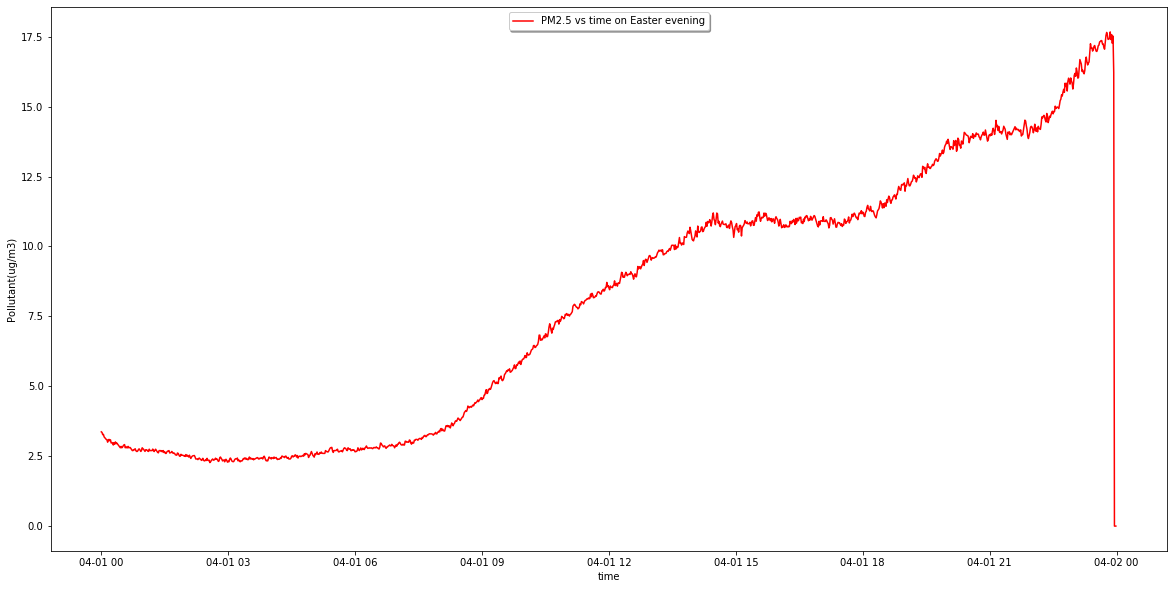

In [4]:
# Visible peak in PM2.5 at Easter
X, Y, xaxis = getSensorInterpolatedData(fields,tstart='2019-04-01 00:00:00',tstop='2019-04-02 00:00:00',fid=4)
plt.plot(xaxis,np.squeeze(np.nanmedian(Y,axis=0)), 'r', label = 'PM2.5 vs time on Easter evening')
left, right = plt.xlim()
plt.xlim(left,right)
plt.xlabel('time')
plt.ylabel('Pollutant(ug/m3)')
legend = plt.legend(loc='upper center', shadow=True)
fig = plt.gcf()
fig.set_size_inches(20, 10)

In [5]:
# Visible peak in PM2.5 at Easter
temp = np.squeeze(np.nanmedian(Y,axis=0))
print(np.min(temp),np.max(temp),np.std(temp),np.mean(temp))

0.0 17.673333333333332 4.680902807538587 7.973625141304534


In [9]:
eventdict, fullmatrix = find_event(fields, startday = 6, stopday = 30, startmonth = 7, stopmonth = 13)

Extracting data over duration  1 days 00:00:00  starting at  2019-07-06 00:00:00
Sampling resolution =  1  minute
start time =  2019-07-06  00:00:00  stop time =  2019-07-07  00:00:00
Min =  0.0 Max =  7.471666666666667 Standard deviation =  1.3615799790930612 Mean  =  3.773811590608466
Extracting data over duration  1 days 00:00:00  starting at  2019-07-07 00:00:00
Sampling resolution =  1  minute
start time =  2019-07-07  00:00:00  stop time =  2019-07-08  00:00:00
Min =  0.0 Max =  5.92 Standard deviation =  1.0752851666265892 Mean  =  1.9952634919275014
Extracting data over duration  1 days 00:00:00  starting at  2019-07-08 00:00:00
Sampling resolution =  1  minute
start time =  2019-07-08  00:00:00  stop time =  2019-07-09  00:00:00
Min =  0.0 Max =  2.163333333333333 Standard deviation =  0.34278321256813443 Mean  =  1.3261380787037038
Extracting data over duration  1 days 00:00:00  starting at  2019-07-09 00:00:00
Sampling resolution =  1  minute
start time =  2019-07-09  00:00:

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:612: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


start time =  2019-07-11  00:00:00  stop time =  2019-07-12  00:00:00
Min =  0.0 Max =  7.5 Standard deviation =  1.2772184525889325 Mean  =  4.372498825925258
Extracting data over duration  1 days 00:00:00  starting at  2019-07-12 00:00:00
Sampling resolution =  1  minute
start time =  2019-07-12  00:00:00  stop time =  2019-07-13  00:00:00
Min =  0.0 Max =  8.933333333333334 Standard deviation =  1.9757846096493605 Mean  =  4.869776183414275
Extracting data over duration  1 days 00:00:00  starting at  2019-07-13 00:00:00
Sampling resolution =  1  minute
start time =  2019-07-13  00:00:00  stop time =  2019-07-14  00:00:00
Min =  0.0 Max =  7.835 Standard deviation =  2.286809040216013 Mean  =  3.8357664363021025
Extracting data over duration  1 days 00:00:00  starting at  2019-07-14 00:00:00
Sampling resolution =  1  minute
start time =  2019-07-14  00:00:00  stop time =  2019-07-15  00:00:00
Min =  0.0 Max =  6.5 Standard deviation =  1.6125300688264197 Mean  =  2.5115425429795026
E

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:609: RuntimeWarning: invalid value encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


start time =  2019-07-15  00:00:00  stop time =  2019-07-16  00:00:00
Min =  0.0 Max =  5.556666666666667 Standard deviation =  1.065893765062094 Mean  =  3.5338471140322407
Extracting data over duration  1 days 00:00:00  starting at  2019-07-16 00:00:00
Sampling resolution =  1  minute
start time =  2019-07-16  00:00:00  stop time =  2019-07-17  00:00:00
Min =  0.0 Max =  8.004166666666666 Standard deviation =  1.4777365670538782 Mean  =  5.014511758496133
Extracting data over duration  1 days 00:00:00  starting at  2019-07-17 00:00:00
Sampling resolution =  1  minute
start time =  2019-07-17  00:00:00  stop time =  2019-07-18  00:00:00
Min =  0.0 Max =  18.07 Standard deviation =  3.2203370397441704 Mean  =  7.779679839790449
Extracting data over duration  1 days 00:00:00  starting at  2019-07-18 00:00:00
Sampling resolution =  1  minute
start time =  2019-07-18  00:00:00  stop time =  2019-07-19  00:00:00
Min =  0.0 Max =  16.4 Standard deviation =  4.380515749120014 Mean  =  6.5464

start time =  2019-08-21  00:00:00  stop time =  2019-08-22  00:00:00
Min =  0.0 Max =  4.378333333333334 Standard deviation =  0.3310400740070125 Mean  =  3.4655778976521168
Extracting data over duration  1 days 00:00:00  starting at  2019-08-22 00:00:00
Sampling resolution =  1  minute
start time =  2019-08-22  00:00:00  stop time =  2019-08-23  00:00:00
Min =  0.0 Max =  6.839166666666667 Standard deviation =  1.1145141642165446 Mean  =  4.3714895667989415
Extracting data over duration  1 days 00:00:00  starting at  2019-08-23 00:00:00
Sampling resolution =  1  minute
start time =  2019-08-23  00:00:00  stop time =  2019-08-24  00:00:00
Min =  0.0 Max =  12.35 Standard deviation =  2.3194637473145945 Mean  =  6.193256022526855
Extracting data over duration  1 days 00:00:00  starting at  2019-08-24 00:00:00
Sampling resolution =  1  minute
start time =  2019-08-24  00:00:00  stop time =  2019-08-25  00:00:00
Min =  0.0 Max =  13.47 Standard deviation =  3.0871299795852734 Mean  =  5.

start time =  2019-09-27  00:00:00  stop time =  2019-09-28  00:00:00
Min =  0.0 Max =  5.2 Standard deviation =  0.9157140430336106 Mean  =  2.320280858523965
Extracting data over duration  1 days 00:00:00  starting at  2019-09-28 00:00:00
Sampling resolution =  1  minute
start time =  2019-09-28  00:00:00  stop time =  2019-09-29  00:00:00
Min =  0.0 Max =  2.55 Standard deviation =  0.2766816102691265 Mean  =  1.8085755222079267
Extracting data over duration  1 days 00:00:00  starting at  2019-09-29 00:00:00
Sampling resolution =  1  minute
start time =  2019-09-29  00:00:00  stop time =  2019-09-30  00:00:00
Min =  0.0 Max =  2.1975000000000002 Standard deviation =  0.2555486431052185 Mean  =  1.513290769081482
Extracting data over duration  1 days 00:00:00  starting at  2019-10-06 00:00:00
Sampling resolution =  1  minute
start time =  2019-10-06  00:00:00  stop time =  2019-10-07  00:00:00
Min =  0.0 Max =  8.23 Standard deviation =  2.126457764881482 Mean  =  4.058388829586534
E

start time =  2019-11-09  00:00:00  stop time =  2019-11-10  00:00:00
Min =  0.0 Max =  26.925 Standard deviation =  6.764289736419616 Mean  =  12.25570048809405
Extracting data over duration  1 days 00:00:00  starting at  2019-11-10 00:00:00
Sampling resolution =  1  minute
start time =  2019-11-10  00:00:00  stop time =  2019-11-11  00:00:00
Min =  0.0 Max =  13.82913043478261 Standard deviation =  3.393769027489353 Mean  =  9.452686654773869
Extracting data over duration  1 days 00:00:00  starting at  2019-11-11 00:00:00
Sampling resolution =  1  minute
start time =  2019-11-11  00:00:00  stop time =  2019-11-12  00:00:00
Min =  0.0 Max =  11.4 Standard deviation =  2.976377851880559 Mean  =  3.98472885602595
Extracting data over duration  1 days 00:00:00  starting at  2019-11-12 00:00:00
Sampling resolution =  1  minute
start time =  2019-11-12  00:00:00  stop time =  2019-11-13  00:00:00
Min =  0.0 Max =  2.83 Standard deviation =  0.5703935877116084 Mean  =  1.5832635254522187
Ex

start time =  2019-12-15  00:00:00  stop time =  2019-12-16  00:00:00
Min =  0.0 Max =  3.965 Standard deviation =  0.8370010482809288 Mean  =  2.401206695966071
Extracting data over duration  1 days 00:00:00  starting at  2019-12-16 00:00:00
Sampling resolution =  1  minute
start time =  2019-12-16  00:00:00  stop time =  2019-12-17  00:00:00
Min =  0.0 Max =  12.863333333333333 Standard deviation =  3.3812001985990805 Mean  =  4.453709679427326
Extracting data over duration  1 days 00:00:00  starting at  2019-12-17 00:00:00
Sampling resolution =  1  minute
start time =  2019-12-17  00:00:00  stop time =  2019-12-18  00:00:00
Min =  0.0 Max =  8.850000000000001 Standard deviation =  1.7254990956489586 Mean  =  3.1158788279437255
Extracting data over duration  1 days 00:00:00  starting at  2019-12-18 00:00:00
Sampling resolution =  1  minute
start time =  2019-12-18  00:00:00  stop time =  2019-12-19  00:00:00
Min =  0.0 Max =  13.57 Standard deviation =  3.3932753147568073 Mean  =  6.

In [10]:
eventdict.keys()

dict_keys(['6-7', '7-7', '8-7', '9-7', '10-7', '11-7', '12-7', '13-7', '14-7', '15-7', '16-7', '17-7', '18-7', '19-7', '20-7', '21-7', '22-7', '23-7', '24-7', '25-7', '26-7', '27-7', '28-7', '29-7', '6-8', '7-8', '8-8', '9-8', '10-8', '11-8', '12-8', '13-8', '14-8', '15-8', '16-8', '17-8', '18-8', '19-8', '20-8', '21-8', '22-8', '23-8', '24-8', '25-8', '26-8', '27-8', '28-8', '29-8', '6-9', '7-9', '8-9', '9-9', '10-9', '11-9', '12-9', '13-9', '14-9', '15-9', '16-9', '17-9', '18-9', '19-9', '20-9', '21-9', '22-9', '23-9', '24-9', '25-9', '26-9', '27-9', '28-9', '29-9', '6-10', '7-10', '8-10', '9-10', '10-10', '11-10', '12-10', '13-10', '14-10', '15-10', '16-10', '17-10', '18-10', '19-10', '20-10', '21-10', '22-10', '23-10', '24-10', '25-10', '26-10', '27-10', '28-10', '29-10', '6-11', '7-11', '8-11', '9-11', '10-11', '11-11', '12-11', '13-11', '14-11', '15-11', '16-11', '17-11', '18-11', '19-11', '20-11', '21-11', '22-11', '23-11', '24-11', '25-11', '26-11', '27-11', '28-11', '29-11', '

In [11]:
fullmatrix.shape

(144, 7)